In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest






In [4]:
data=pd.read_csv('train.csv')
df=data.copy()
test=pd.read_csv('test.csv')
df_test=test.copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
df.drop(columns=['Name'], inplace=True)



In [10]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:", categorical_features)


Categorical Features: ['Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [13]:
for column in numerical_features:
    unique_values = df[column].unique()
    print(f"\nUnique values in {column}: {unique_values[:10]} ...")  # Show only first 10 unique values



Unique values in PassengerId: [ 1  2  3  4  5  6  7  8  9 10] ...

Unique values in Survived: [0 1] ...

Unique values in Pclass: [3 1 2] ...

Unique values in Age: [22. 38. 26. 35. nan 54.  2. 27. 14.  4.] ...

Unique values in SibSp: [1 0 3 4 2 5 8] ...

Unique values in Parch: [0 1 2 5 3 4 6] ...

Unique values in Fare: [ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708] ...


convert categorical data to numerical data


In [14]:
df['Sex']=df['Sex'].map({"male":0,"female":1})
df['Embarked']=df['Embarked'].map({"S":0,"Q":1,"C":2})
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0


seprate Ticket to Ticket_Prefix & Ticket_Number

In [15]:
df["Ticket_Prefix"] = df["Ticket"].str.extract(r'([A-Za-z]+)')
df["Ticket_Number"] = df["Ticket"].str.extract(r'(\d+)')
df["Ticket_Prefix"] = df["Ticket_Prefix"].fillna("Unknown")
df["Ticket_Number"] = df["Ticket_Number"].astype(float)
df.loc[:, "Ticket_Prefix"] = df["Ticket_Prefix"].fillna(0)
encoder_prefix = LabelEncoder()
df["Ticket_Prefix"] = encoder_prefix.fit_transform(df["Ticket_Prefix"])
df.drop(columns=['Ticket'], inplace=True)


convert Cabin to Deck for predicting easier

In [16]:
df["Deck"] = df["Cabin"].astype(str).str[0]  # Extract first letter
df.loc[df["Deck"] == "n", "Deck"] =np.nan  # Convert 'n' (if present) to NaN
known_cabin = df[df["Deck"].notnull()].copy()  # Use `.copy()` to avoid SettingWithCopyWarning
unknown_cabin = df[df["Deck"].isnull()].copy()
df["Deck"] = df["Deck"].fillna("Unknown")  # مقداردهی `NaN` به Unknown
encoder_deck = LabelEncoder()
df["Deck"] = encoder_deck.fit_transform(df["Deck"])  # تبدیل `Deck` به مقدار عددی
unknown_label = encoder_deck.transform(["Unknown"])[0]  # مقدار عددی `Unknown`
df.drop(columns=['Cabin'], inplace=True)




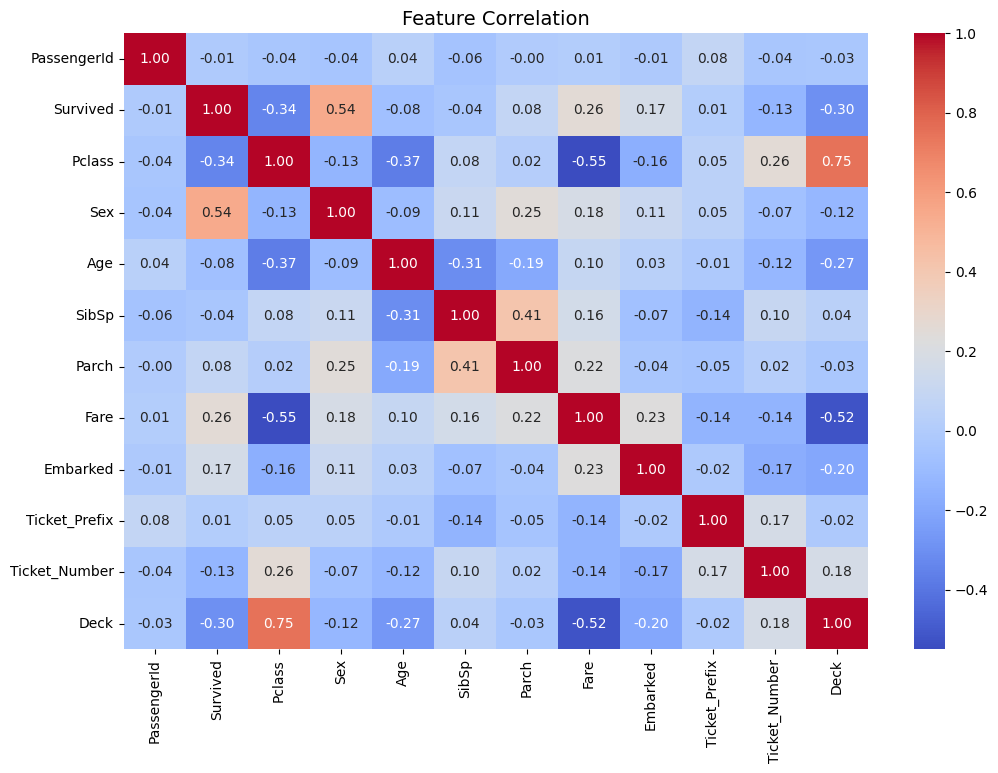

In [17]:

# تنظیم اندازه‌ی تصویر
plt.figure(figsize=(12, 8))

# رسم Heatmap همبستگی با نام ستون‌ها
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=df.columns, yticklabels=df.columns)

# تنظیم عنوان
plt.title("Feature Correlation", fontsize=14)

# نمایش نمودار
plt.show()


normalizing data

In [18]:
scaler = MinMaxScaler()
df[["Pclass", "SibSp", "Parch", "Fare","Ticket_Prefix"]] = scaler.fit_transform(df[["Pclass", "SibSp", "Parch", "Fare","Ticket_Prefix"]])


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2
Ticket_Prefix,0


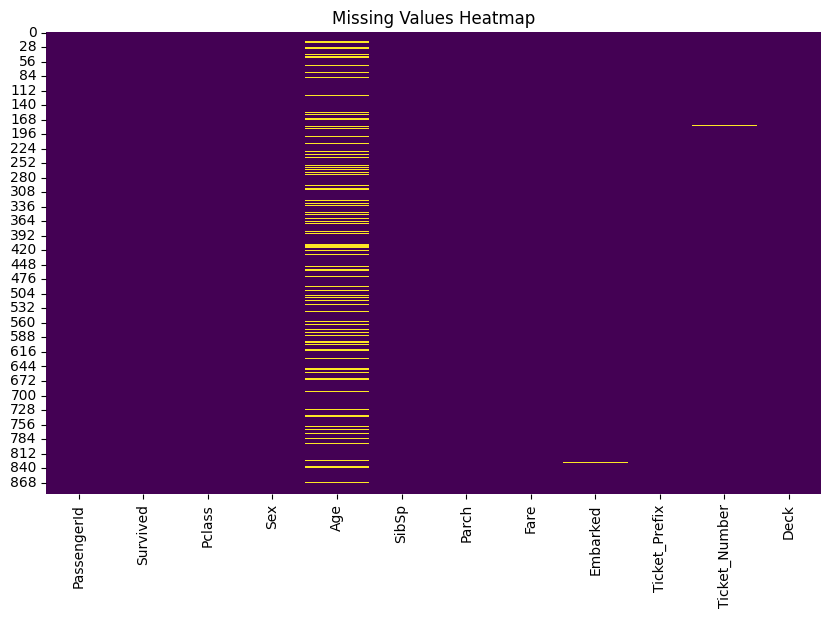

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



In [21]:
# Find rows with missing TicketNumber values
missing_Ticket_Number_rows = df[df["Ticket_Number"].isnull()]
print("Missing `Ticket_Number` rows:")
print(missing_Ticket_Number_rows)


Missing `Ticket_Number` rows:
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Embarked  \
179          180         0     1.0    0  36.0    0.0    0.0   0.0       0.0   
271          272         1     1.0    0  25.0    0.0    0.0   0.0       0.0   
302          303         0     1.0    0  19.0    0.0    0.0   0.0       0.0   
597          598         0     1.0    0  49.0    0.0    0.0   0.0       0.0   

     Ticket_Prefix  Ticket_Number  Deck  
179       0.277778            NaN     8  
271       0.277778            NaN     8  
302       0.277778            NaN     8  
597       0.277778            NaN     8  


In [22]:

# Check distribution of TicketNumber for similar passengers
similar_passengers = df[(df["Pclass"] == missing_Ticket_Number_rows["Pclass"].values[0]) &
                        (df["Ticket_Prefix"] == missing_Ticket_Number_rows["Ticket_Prefix"].values[0])]
print("\Ticket_Number distribution for similar passengers:")
print(similar_passengers["Ticket_Number"].value_counts())


\Ticket_Number distribution for similar passengers:
Series([], Name: count, dtype: int64)


In [23]:
ticket_mode = similar_passengers["Ticket_Number"].mode()
if not ticket_mode.empty:
    most_likely_embarked = ticket_mode[0]
else:
    most_likely_embarked = df["Ticket_Number"].mode()[0]  # Use global mode as fallback


In [24]:
# Ensure Ticket_Number exists and mode is not empty
if "Ticket_Number" in similar_passengers.columns and not similar_passengers["Ticket_Number"].mode().empty:
    most_likely_embarked = similar_passengers["Ticket_Number"].mode()[0]
else:
    most_likely_embarked = df["Ticket_Number"].mode()[0]  # Fallback to overall mode

# Fill missing Ticket_Number values
df.loc[df["Ticket_Number"].isnull(), "Ticket_Number"] = most_likely_embarked
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2
Ticket_Prefix,0


In [25]:
scaler = MinMaxScaler()
df["Ticket_Number"] = scaler.fit_transform(df[["Ticket_Number"]])


In [26]:
# Find rows with missing Embarked values
missing_embarked_rows = df[df["Embarked"].isnull()]
print("Missing `Embarked` rows:")
print(missing_embarked_rows)


Missing `Embarked` rows:
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
61            62         1     0.0    1  38.0    0.0    0.0  0.15615   
829          830         1     0.0    1  62.0    0.0    0.0  0.15615   

     Embarked  Ticket_Prefix  Ticket_Number  Deck  
61        NaN       0.888889        0.03662     1  
829       NaN       0.888889        0.03662     1  


In [27]:

# Check distribution of Embarked for similar passengers
similar_passengers = df[(df["Pclass"] == missing_embarked_rows["Pclass"].values[0]) &
                             (df["Fare"] >= missing_embarked_rows["Fare"].values[0] - 5) &
                             (df["Fare"] <= missing_embarked_rows["Fare"].values[0] + 5)&
                            (df["Ticket_Number"] >= missing_embarked_rows["Ticket_Number"].values[0] - 5) &
                             (df["Ticket_Number"] <= missing_embarked_rows["Ticket_Number"].values[0] + 5)]
print("\nEmbarked distribution for similar passengers:")
print(similar_passengers["Embarked"].value_counts())



Embarked distribution for similar passengers:
Embarked
0.0    127
2.0     85
1.0      2
Name: count, dtype: int64


In [28]:
# Fill missing `Embarked` with the most frequent value in similar passengers
most_likely_embarked = similar_passengers["Embarked"].mode()[0]
df.loc[df["Embarked"].isnull(), "Embarked"] = most_likely_embarked


print("\nUpdated `Embarked` column:")
print(df["Embarked"].isnull().sum())  # Should print 0 (No missing values)
df.isnull().sum()


Updated `Embarked` column:
0


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0
Ticket_Prefix,0


In [29]:

# Select features that correlate with Age
age_features = ["Pclass", "SibSp", "Parch", "Ticket_Number"]
age_df = df[age_features + ["Age"]]

# Split into known and unknown age data
known_age = age_df[age_df["Age"].notnull()]
unknown_age = age_df[age_df["Age"].isnull()]

# Train a model to predict Age
X_train = known_age.drop(columns=["Age"])
y_train = known_age["Age"]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict missing Age values
predicted_ages = rf.predict(unknown_age.drop(columns=["Age"]))

# Fill missing Age values with predictions
df.loc[df["Age"].isnull(), "Age"] = predicted_ages
# print(accuracy)

In [30]:
scaler = MinMaxScaler()
df[["Age", "Embarked"]] = scaler.fit_transform(df[["Age", "Embarked"]])


train model to predict missing Deck

In [31]:
features = ["Pclass", "Fare", "SibSp", "Parch", "Embarked", "Ticket_Prefix", "Ticket_Number"]
X = known_cabin[features]
y = known_cabin["Deck"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
predicted_decks = model.predict(unknown_cabin[features])
predicted_decks = np.array(predicted_decks)
predicted_decks_encoded = encoder_deck.transform(predicted_decks)
predicted_decks = predicted_decks.astype(str)
predicted_decks = np.array([int(encoder_deck.transform([val])[0]) for val in predicted_decks])  # تبدیل به `int`
df.loc[df["Deck"] == unknown_label, "Deck"] = predicted_decks
print(accuracy)


0.6341463414634146


In [32]:
scaler = MinMaxScaler()
df["Deck"] = scaler.fit_transform(df[["Deck"]])

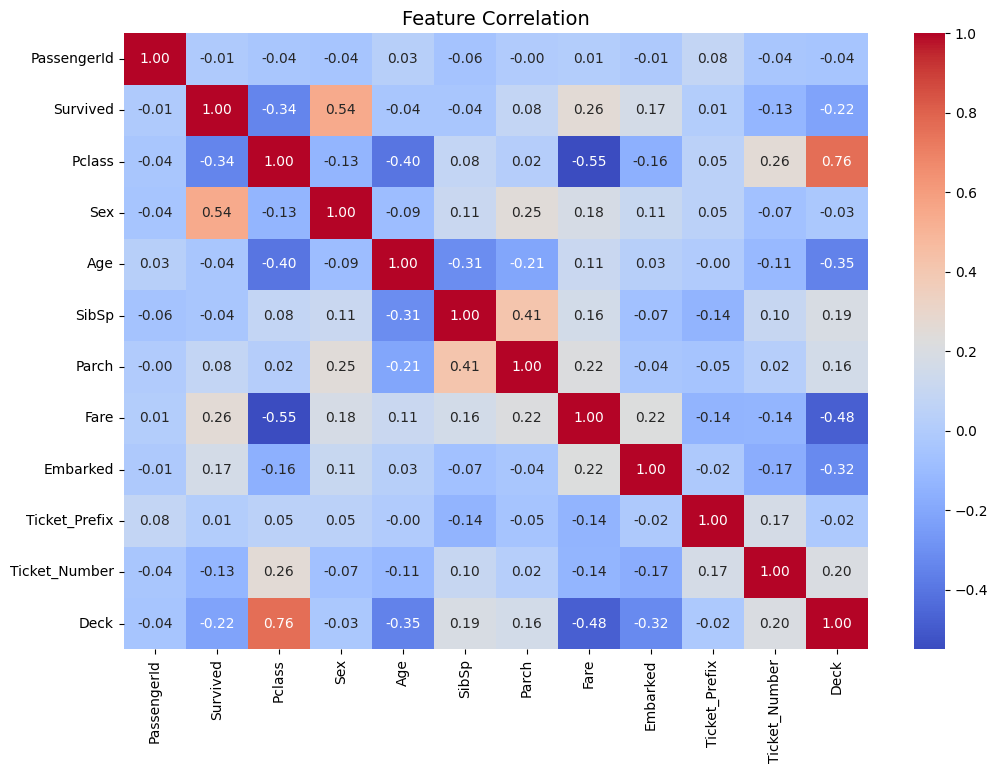

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=df.columns, yticklabels=df.columns)
plt.title("Feature Correlation", fontsize=14)
plt.show()

In [34]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex", "Deck","Ticket_Number","Ticket_Prefix"]
X = df[features].copy()
y = df["Survived"].values.reshape(-1, 1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
def initialize_parameters(n_input, n_hidden, n_output):
    np.random.seed(42)  # مقدار اولیه برای تولید اعداد تصادفی
    W1 = np.random.randn(n_hidden, n_input) * 0.01  # وزن‌های لایه‌ی مخفی
    b1 = np.zeros((1,n_hidden))  # بایاس‌های لایه‌ی مخفی
    W2 = np.random.randn(n_output, n_hidden) * 0.01  # وزن‌های لایه‌ی خروجی
    b2= np.zeros((1,n_output))  # بایاس‌های لایه‌ی خروجی
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}


In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def LeakyRelu(x):
      return np.where(x > 0, x, 0.1 * x)

def relu_div(x):
      return np.where(x > 0, 1, 0.1 )


In [38]:
def forward_propagation(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]


    Z1 = np.dot(X,W1.T) + b1  # مجموع وزن‌دار ورودی‌ها
    A1 = LeakyRelu(Z1)


    Z2 = np.dot(A1,W2.T) + b2
    A2 = sigmoid(Z2)  # خروجی نهایی (احتمال زنده ماندن)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}  # ذخیره محاسبات
    return A2, cache

In [39]:
# محاسبه‌ی هزینه (Loss)
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (1 / m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return -cost



In [40]:
# انتشار به عقب (محاسبه‌ی گرادیان‌ها)
def backward_propagation(X, Y, params, cache):

    m = X.shape[1]  # تعداد نمونه‌ها



    dZ2=cache["A2"]-Y
    dW2=np.dot(dZ2.T,cache["A1"])/m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / 10  # Gradient for b2
    dZ1 = np.dot(dZ2, params["W2"]) * relu_div(cache["Z1"])  # Derivative of loss with respect to Z1
    dW1 = np.dot(dZ1.T,X) / m  # Gradient for W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / 10  # Gradient for b1


    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads


In [41]:
# به‌روزرسانی وزن‌ها و بایاس‌ها
def update_parameters(params, grads, learning_rate):


    params["W1"] -= learning_rate * grads["dW1"]
    params["b1"] -= learning_rate * grads["db1"]
    params["W2"] -= learning_rate * grads["dW2"]
    params["b2"] -= learning_rate * grads["db2"]
    return params


In [42]:
# آموزش شبکه‌ی عصبی
def train_nn(X, Y, n_hidden=3, learning_rate=0.001, epochs=10000000):
    np.random.seed(42)
    n_input, n_output = X.shape[1], 1  # تعداد ویژگی‌ها و خروجی

    # مقداردهی اولیه‌ی پارامترها
    params = initialize_parameters(n_input, n_hidden, n_output)
    cost_values=[]



    # حلقه‌ی آموزش
    for i in range(epochs):
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y)
        cost_values.append(cost)
        grads = backward_propagation(X, Y, params, cache)
        params = update_parameters(params, grads, learning_rate)



        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")
            plt.figure(figsize=(8, 5))
            plt.plot(range(len(cost_values)), cost_values, label="Cost Function", color='b', marker='o', linestyle='-')
            print("Gradient dW1:", np.linalg.norm(grads["dW1"]))
            print("Gradient dW2:", np.linalg.norm(grads["dW2"]))
            # تنظیمات نمودار
            plt.xlabel("Epochs")
            plt.ylabel("Cost")
            plt.title("Cost Function During Training")
            plt.legend()
            plt.grid()
            plt.show()


    return params


Epoch 0, Cost: 493.5164
Gradient dW1: 0.097528887989956
Gradient dW2: 0.1617307593684059


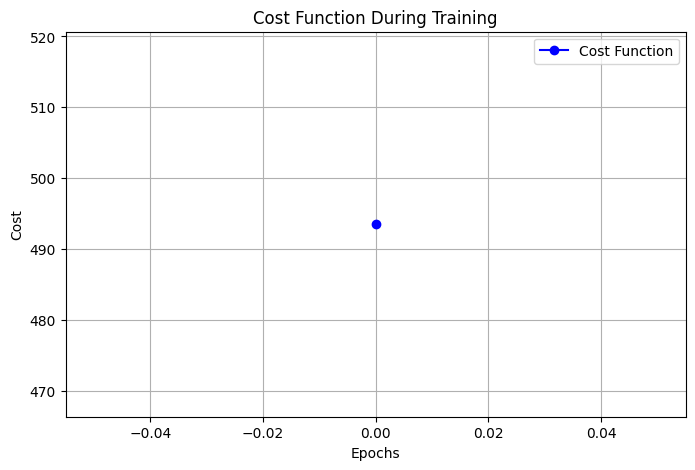

Epoch 100, Cost: 329.0754
Gradient dW1: 3.9650266958050047
Gradient dW2: 1.396130679921409


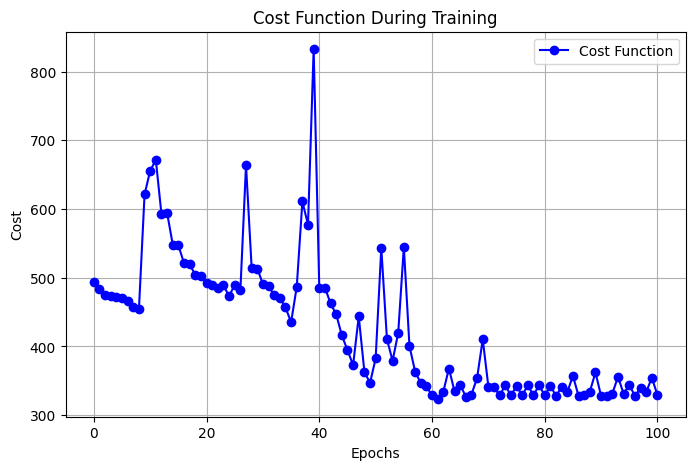

Epoch 200, Cost: 322.4865
Gradient dW1: 3.8457846836405576
Gradient dW2: 2.346346269396442


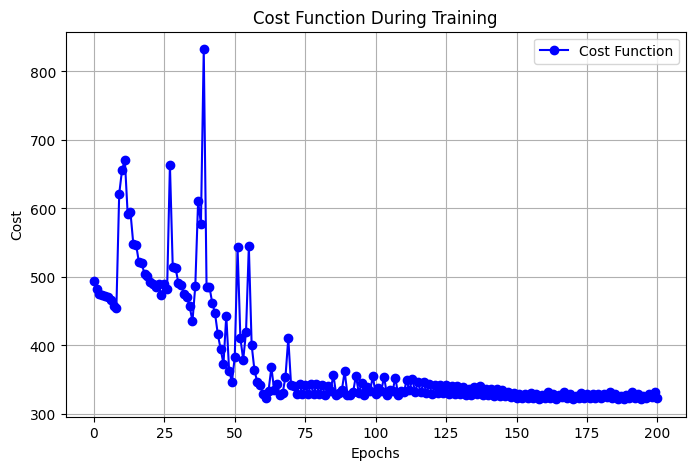

Epoch 300, Cost: 316.5511
Gradient dW1: 3.7773212884693237
Gradient dW2: 2.12044612172694


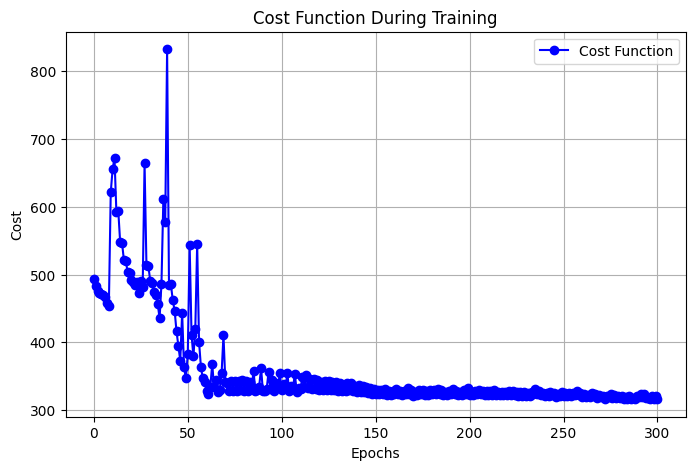

Epoch 400, Cost: 313.3673
Gradient dW1: 3.9541359347406435
Gradient dW2: 2.4152655464793935


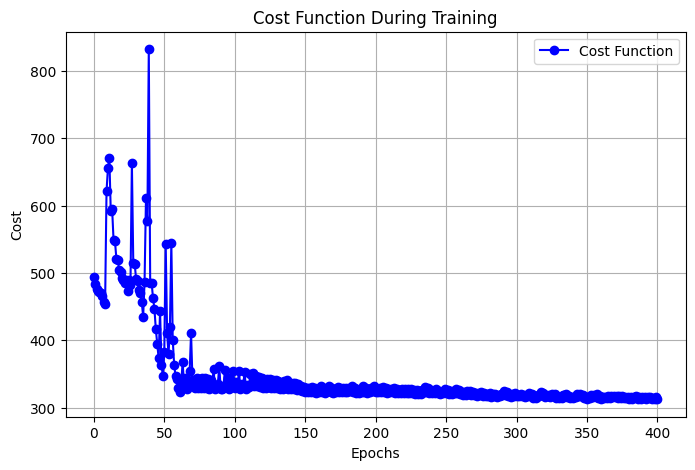

Epoch 500, Cost: 312.1467
Gradient dW1: 3.7366528173228426
Gradient dW2: 2.390142464196966


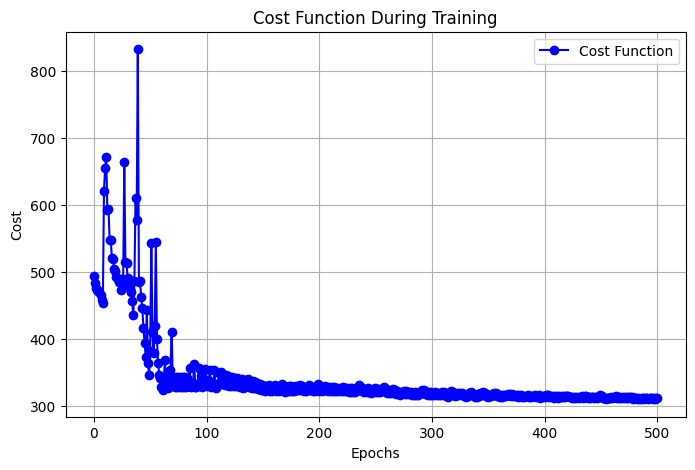

Epoch 600, Cost: 309.2660
Gradient dW1: 3.419287671395564
Gradient dW2: 2.2989831163743224


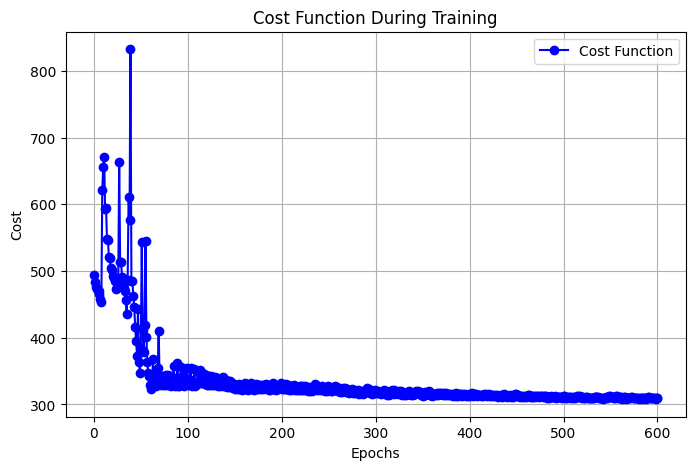

Epoch 700, Cost: 309.0721
Gradient dW1: 3.442114520003168
Gradient dW2: 2.30441590842127


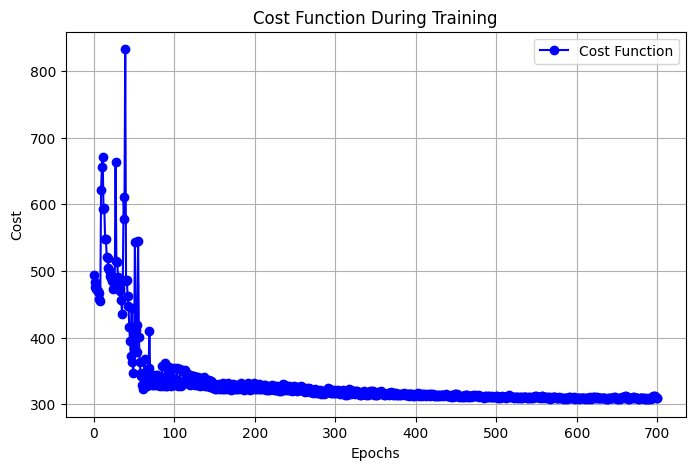

Epoch 800, Cost: 310.7025
Gradient dW1: 4.069706614181251
Gradient dW2: 2.6554412271876084


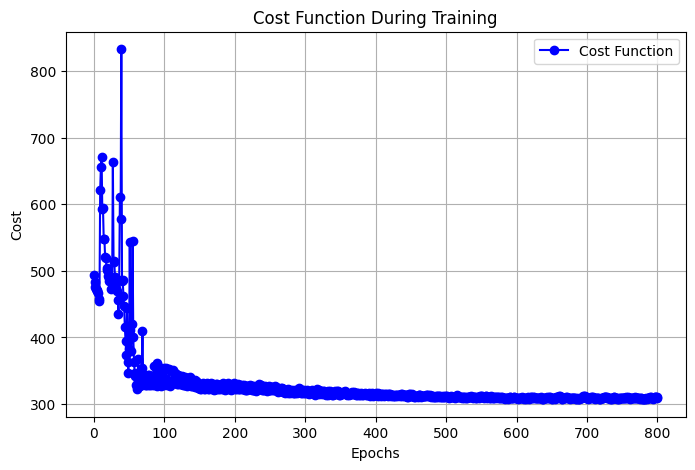

Epoch 900, Cost: 312.7092
Gradient dW1: 5.039544660942866
Gradient dW2: 3.0892849050870717


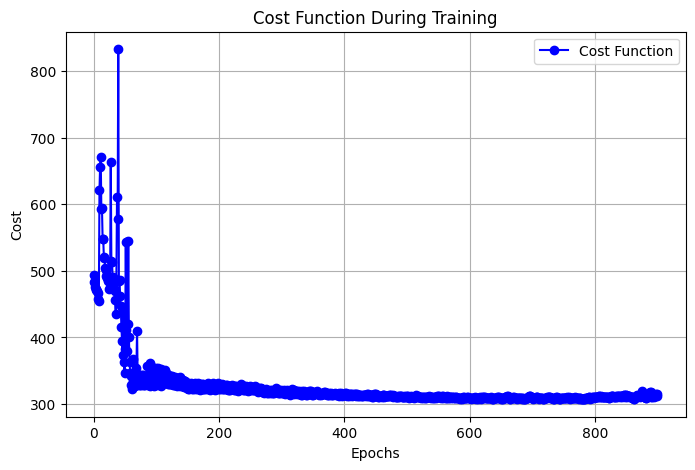

Epoch 1000, Cost: 306.4529
Gradient dW1: 4.523790831510947
Gradient dW2: 2.586822063134802


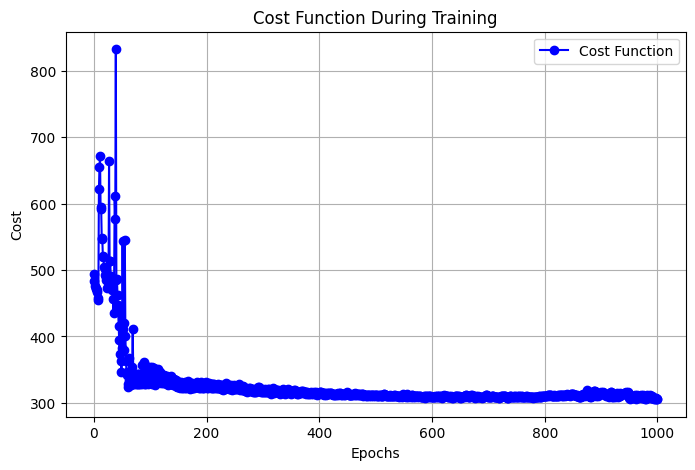

Epoch 1100, Cost: 317.4713
Gradient dW1: 10.151278669905954
Gradient dW2: 3.703218591537807


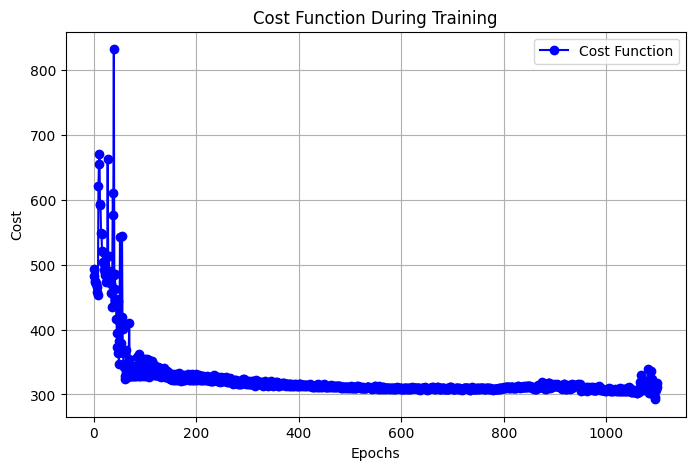

Epoch 1200, Cost: 299.5200
Gradient dW1: 5.780476482571499
Gradient dW2: 3.162514366477745


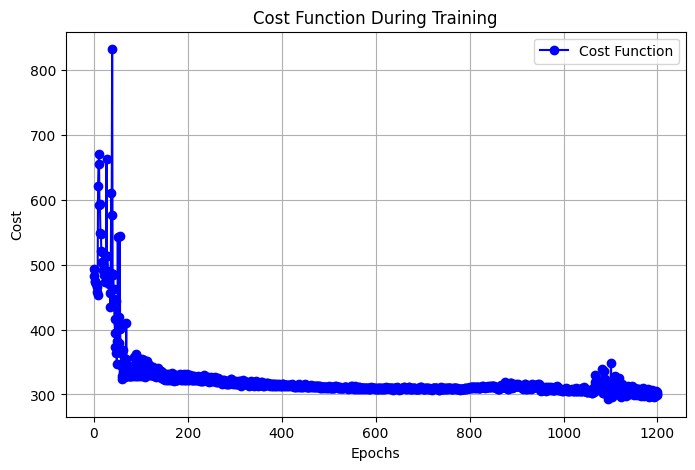

Epoch 1300, Cost: 295.1832
Gradient dW1: 4.931808585590214
Gradient dW2: 3.0707577851194836


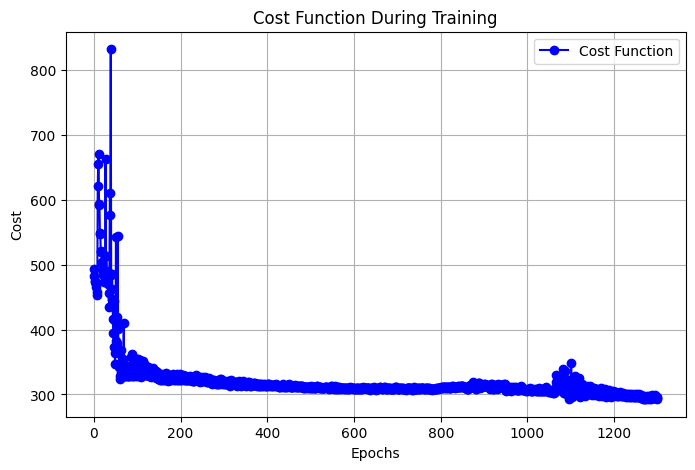

Epoch 1400, Cost: 288.8300
Gradient dW1: 4.309539657663888
Gradient dW2: 2.796992286587749


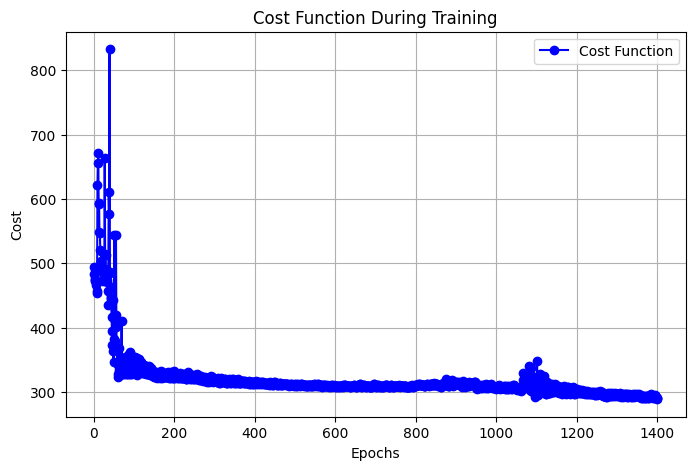

Epoch 1500, Cost: 290.7272
Gradient dW1: 4.327003502146043
Gradient dW2: 3.51792452870335


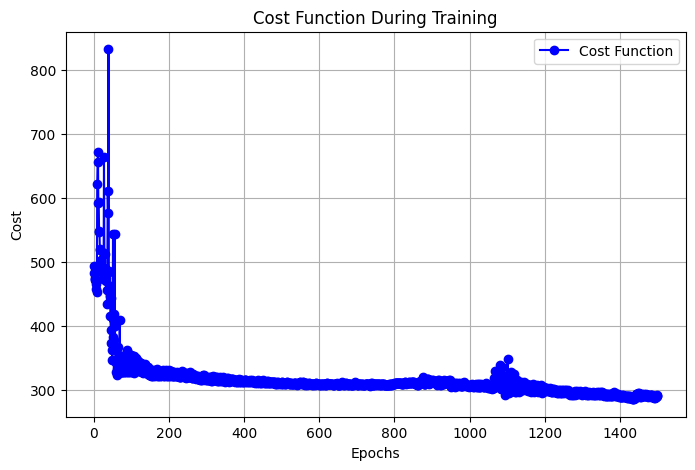

Epoch 1600, Cost: 287.9729
Gradient dW1: 4.208866733131126
Gradient dW2: 3.3605550597756184


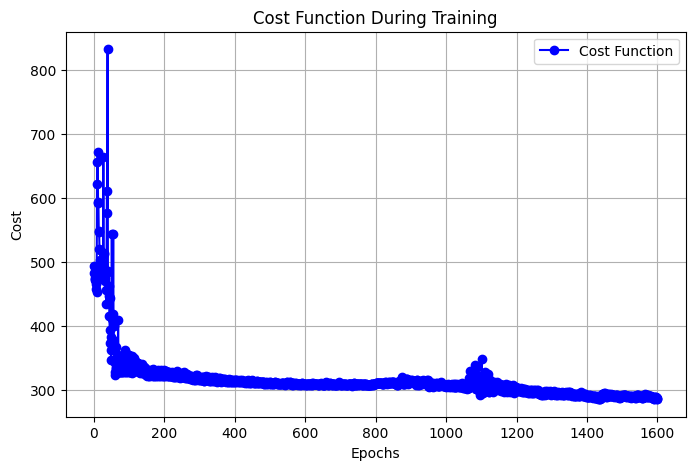

Epoch 1700, Cost: 285.6511
Gradient dW1: 3.7640308811267933
Gradient dW2: 3.1867610979707854


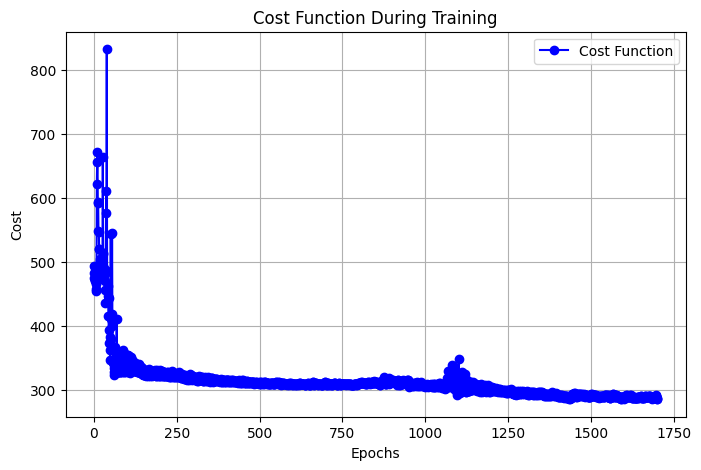

Epoch 1800, Cost: 289.8900
Gradient dW1: 4.164137217664146
Gradient dW2: 3.658653782399304


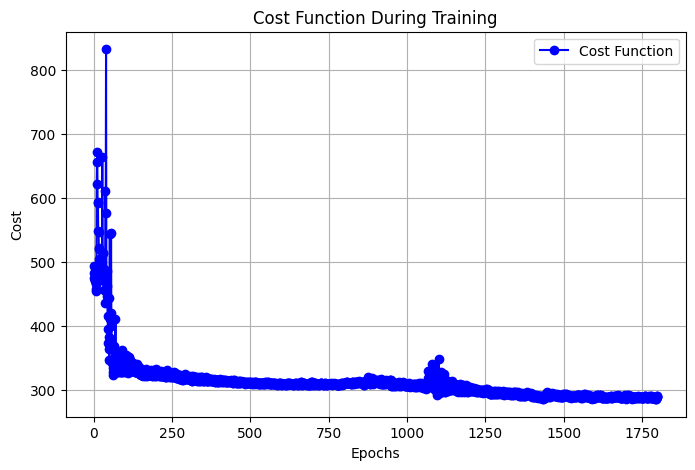

Epoch 1900, Cost: 288.3266
Gradient dW1: 4.1334295028037085
Gradient dW2: 3.653363492137006


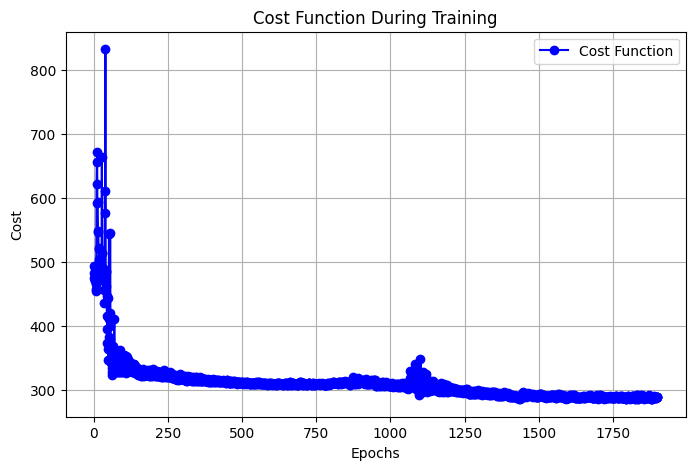

In [43]:
params = train_nn(X_train, Y_train, n_hidden=3, learning_rate=0.1, epochs=2000)

In [44]:




df_test["Ticket_Prefix"] = df_test["Ticket"].str.extract(r'([A-Za-z]+)')[0]
df_test["Ticket_Number"] = df_test["Ticket"].str.extract(r'(\d+)')[0]

# جایگزینی NaN با مقدار 0 و تبدیل به float
df_test["Ticket_Number"] = df_test["Ticket_Number"].fillna(0).astype(float)

# مقداردهی اولیه LabelEncoder و تبدیل مقادیر دسته‌ای به عدد
encoder_prefix = LabelEncoder()
df_test["Ticket_Prefix"] = df_test["Ticket_Prefix"].fillna("None")  # جلوگیری از NaN
df_test["Ticket_Prefix"] = encoder_prefix.fit_transform(df_test["Ticket_Prefix"])

print("Ticket features extracted and encoded successfully!")


Ticket features extracted and encoded successfully!


In [45]:
df_test["Deck"] = df_test["Cabin"].astype(str).str[0]  # Extract first letter
 # مقداردهی `NaN` به Unknown
encoder_deck = LabelEncoder()
df_test["Deck"] = encoder_deck.fit_transform(df_test["Deck"])  # تبدیل `Deck` به مقدار عددی





In [46]:
df_test['Sex']=df_test['Sex'].map({"male":0,"female":1})
df_test['Embarked']=df_test['Embarked'].map({"S":0,"Q":1,"C":2})

In [47]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


X_test=df_test[features].copy()



In [48]:
Z1 = np.dot(X_test, params["W1"].T) + params["b1"]
A1 = LeakyRelu(Z1)

Z2 = np.dot(A1, params["W2"].T) + params["b2"]
Y_pred = (Z2 > 0.5).astype(int)  # تبدیل احتمالات به 0 یا 1


# ایجاد فایل submission
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"].astype(int),
    "Survived": Y_pred.flatten().astype(int)
})

# ذخیره فایل CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
